In [37]:
import matplotlib.pyplot as plt
import scikitplot as skplt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

warnings.filterwarnings('ignore')

In [38]:
# Membaca dan menyimpan dataset train
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
157631,1.0,0.676923,1.0,0.538462,1.0,1.0,0.0,0.047377,0.759259,0.608997,0
270354,0.0,0.246154,1.0,0.692308,1.0,1.0,0.0,0.058752,0.932099,0.837370,0
79182,1.0,0.323077,1.0,0.634615,0.0,1.0,1.0,0.088147,0.172840,0.211073,0
210855,1.0,0.492308,1.0,0.884615,0.0,1.0,1.0,0.057431,0.154321,0.499247,1
164437,1.0,0.061538,1.0,0.961538,1.0,0.0,0.0,0.038727,0.932099,0.463668,0


In [39]:
# Membaca dan menyimpan dataset test
df_test = pd.read_csv('../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
31506,1,0.461538,1,0.884615,0,1,1,0.043279,0.555556,0.536332,0
10722,1,0.553846,1,0.538462,1,1,0,0.039590,0.179012,0.051903,0
4231,0,0.415385,1,0.538462,0,1,1,0.170450,0.154321,0.155709,0
29215,1,0.784615,1,0.750000,0,2,1,0.049530,0.154321,0.685121,0
31238,0,0.076923,1,0.865385,1,0,0,0.044027,0.925926,0.591696,0


0    250661
1     35001
Name: Tertarik, dtype: int64


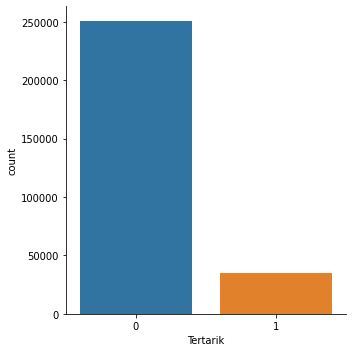

In [40]:
# Mengecek keseimbangan target variable
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [41]:
# Memisahkan antara feature dan target variable
x_train = df.drop("Tertarik", axis=1)
y_train = df["Tertarik"]

## **Tuning Model**

In [42]:
# Mendefinisikan array untuk kumpulan algoritma machine learning yang akan digunakan
classifier = [
    DecisionTreeClassifier(class_weight='balanced'),
    SGDClassifier(class_weight='balanced', loss="modified_huber"),
    GaussianNB(),
    AdaBoostClassifier(),
    RandomForestClassifier(class_weight='balanced'),
]

name = [
    'Decision Tree',
    'SGDClassifier',
    'Naive Bayes',
    'AdaBoost',
    'Random Forest',
]

### **Melatih Model Machine Learning**

In [43]:
# Melakukan pelatihan terhadap model yang telah didefinisikan sebelumnya
for models in classifier:
    models.fit(x_train, y_train)

In [44]:
# Mendefinisikan fungsi untuk evaluasi metrik untuk setiap model yang terdiri atas
# Confusion Matrix, ROC Curve, F1 Score, Precision, Recall, Dan Accuracy

def report(model, title, x_test, y_test):
    result = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, result)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d', ax=axes[0])
    skplt.metrics.plot_roc(y_test, model.predict_proba(x_test), ax=axes[1])

    axes[0].set_ylabel('Actual')
    axes[0].set_xlabel('Predicted')
    axes[0].set_title(f'Confusion matrix {title}', pad=16)

    plt.show()

    f1 = round(f1_score(y_test, result), 3)
    recall = round(recall_score(y_test, result), 3)
    precision = round(precision_score(y_test, result), 3)
    roc = round(roc_auc_score(y_test, result), 3)
    accuracy = round(accuracy_score(y_test, result), 3)

    print("F1-Score \t:", f1)
    print("Recall \t\t:", recall)
    print("Precision \t:", precision)
    print("ROC-AUC \t:", roc)
    print("Accuracy \t:", accuracy, end="\n\n")

    return title, f1, recall, precision, roc, accuracy

## **Memprediksi Dan Evaluasi Data Test**

In [45]:
# Mendefinisikan fungsi untuk evaluasi metrik untuk setiap model yang terdiri atas
# Confusion Matrix, ROC Curve, F1 Score, Precision, Recall, Dan Accuracy

def report(model, title, x_test, y_test):
    result = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, result)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d', ax=axes[0])
    skplt.metrics.plot_roc(y_test, model.predict_proba(x_test), ax=axes[1])

    axes[0].set_ylabel('Actual')
    axes[0].set_xlabel('Predicted')
    axes[0].set_title(f'Confusion matrix {title}', pad=16)

    plt.show()

    f1 = round(f1_score(y_test, result), 3)
    recall = round(recall_score(y_test, result), 3)
    precision = round(precision_score(y_test, result), 3)
    roc = round(roc_auc_score(y_test, result), 3)
    accuracy = round(accuracy_score(y_test, result), 3)

    print("F1-Score \t:", f1)
    print("Recall \t\t:", recall)
    print("Precision \t:", precision)
    print("ROC-AUC \t:", roc)
    print("Accuracy \t:", accuracy, end="\n\n")

    return title, f1, recall, precision, roc, accuracy


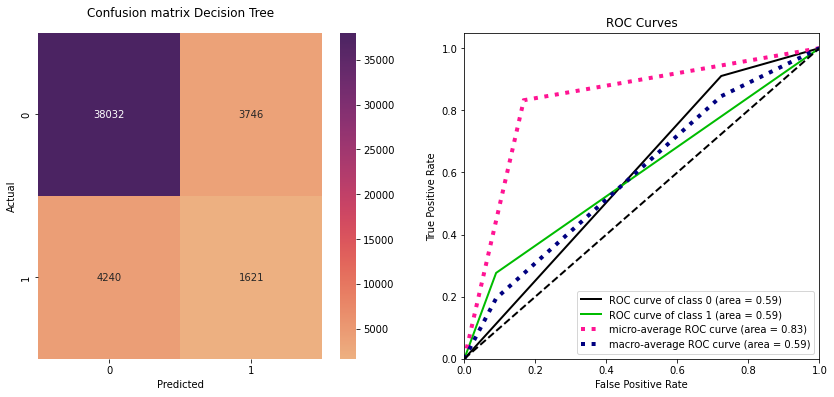

F1-Score 	: 0.289
Recall 		: 0.277
Precision 	: 0.302
ROC-AUC 	: 0.593
Accuracy 	: 0.832



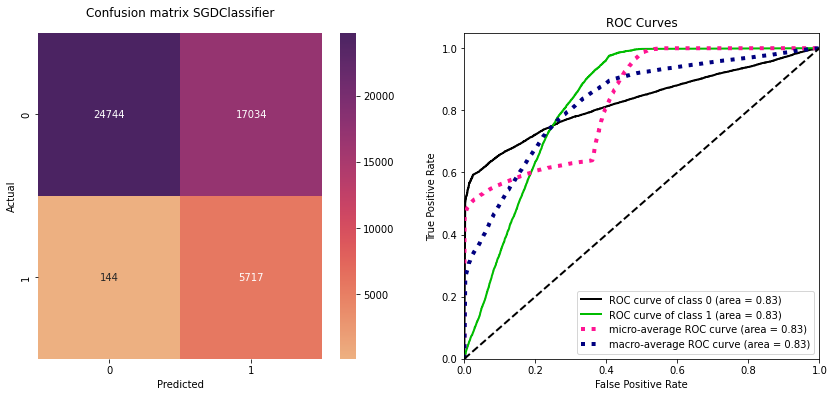

F1-Score 	: 0.4
Recall 		: 0.975
Precision 	: 0.251
ROC-AUC 	: 0.784
Accuracy 	: 0.639



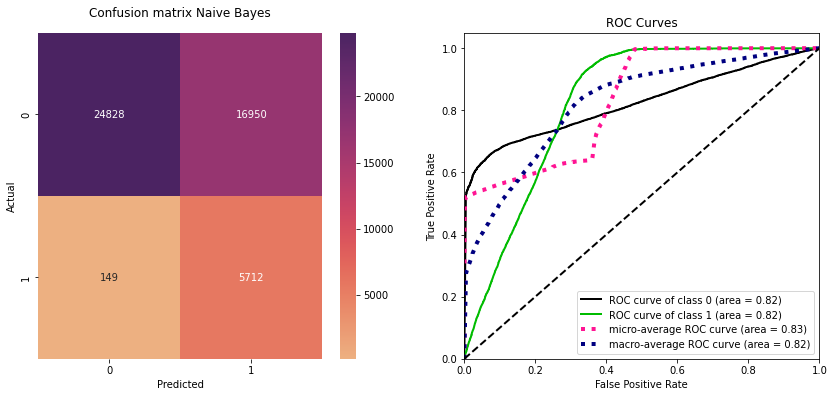

F1-Score 	: 0.401
Recall 		: 0.975
Precision 	: 0.252
ROC-AUC 	: 0.784
Accuracy 	: 0.641



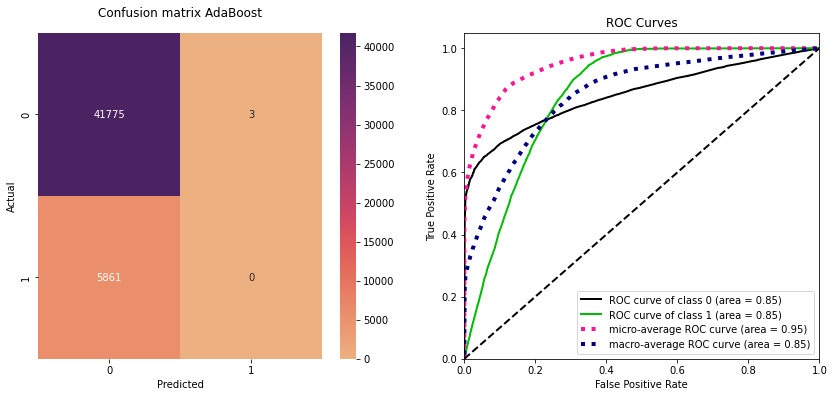

F1-Score 	: 0.0
Recall 		: 0.0
Precision 	: 0.0
ROC-AUC 	: 0.5
Accuracy 	: 0.877



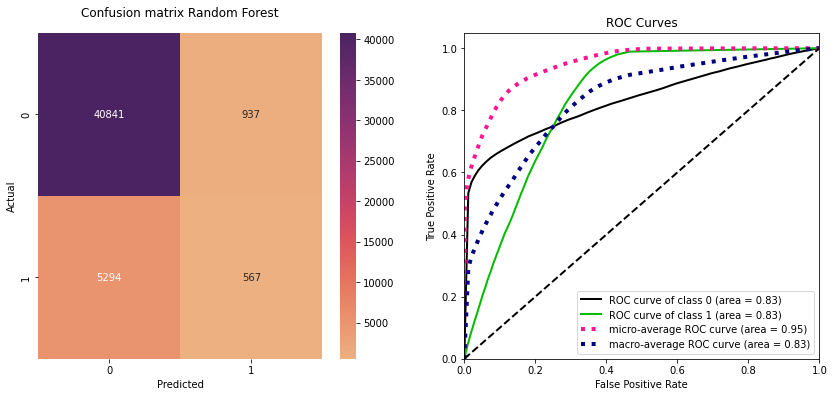

F1-Score 	: 0.154
Recall 		: 0.097
Precision 	: 0.377
ROC-AUC 	: 0.537
Accuracy 	: 0.869



In [46]:
# Memisahkan antara feature dan target variable untuk data test
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

# Melakukan perulangan untuk menampilkan hasil evaluasi data test setiap model
metrics_report_test = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_test, y_test)
    metrics_report_test.append([title, f1, recall, precision, roc, accuracy])


### **Jika Menginginkan Prediksi Seimbang Antara True Positive dan True Negative**

In [47]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['ROC-AUC'], ascending=False)


,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
1,SGDClassifier,0.400,0.975,0.251,0.784,0.639
2,Naive Bayes,0.401,0.975,0.252,0.784,0.641
0,Decision Tree,0.289,0.277,0.302,0.593,0.832
4,Random Forest,0.154,0.097,0.377,0.537,0.869
3,AdaBoost,0.000,0.000,0.000,0.500,0.877


### **Jika Lebih Menginginkan Prediksi True Postive**

In [48]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['Recall'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
1,SGDClassifier,0.400,0.975,0.251,0.784,0.639
2,Naive Bayes,0.401,0.975,0.252,0.784,0.641
0,Decision Tree,0.289,0.277,0.302,0.593,0.832
4,Random Forest,0.154,0.097,0.377,0.537,0.869
3,AdaBoost,0.000,0.000,0.000,0.500,0.877
